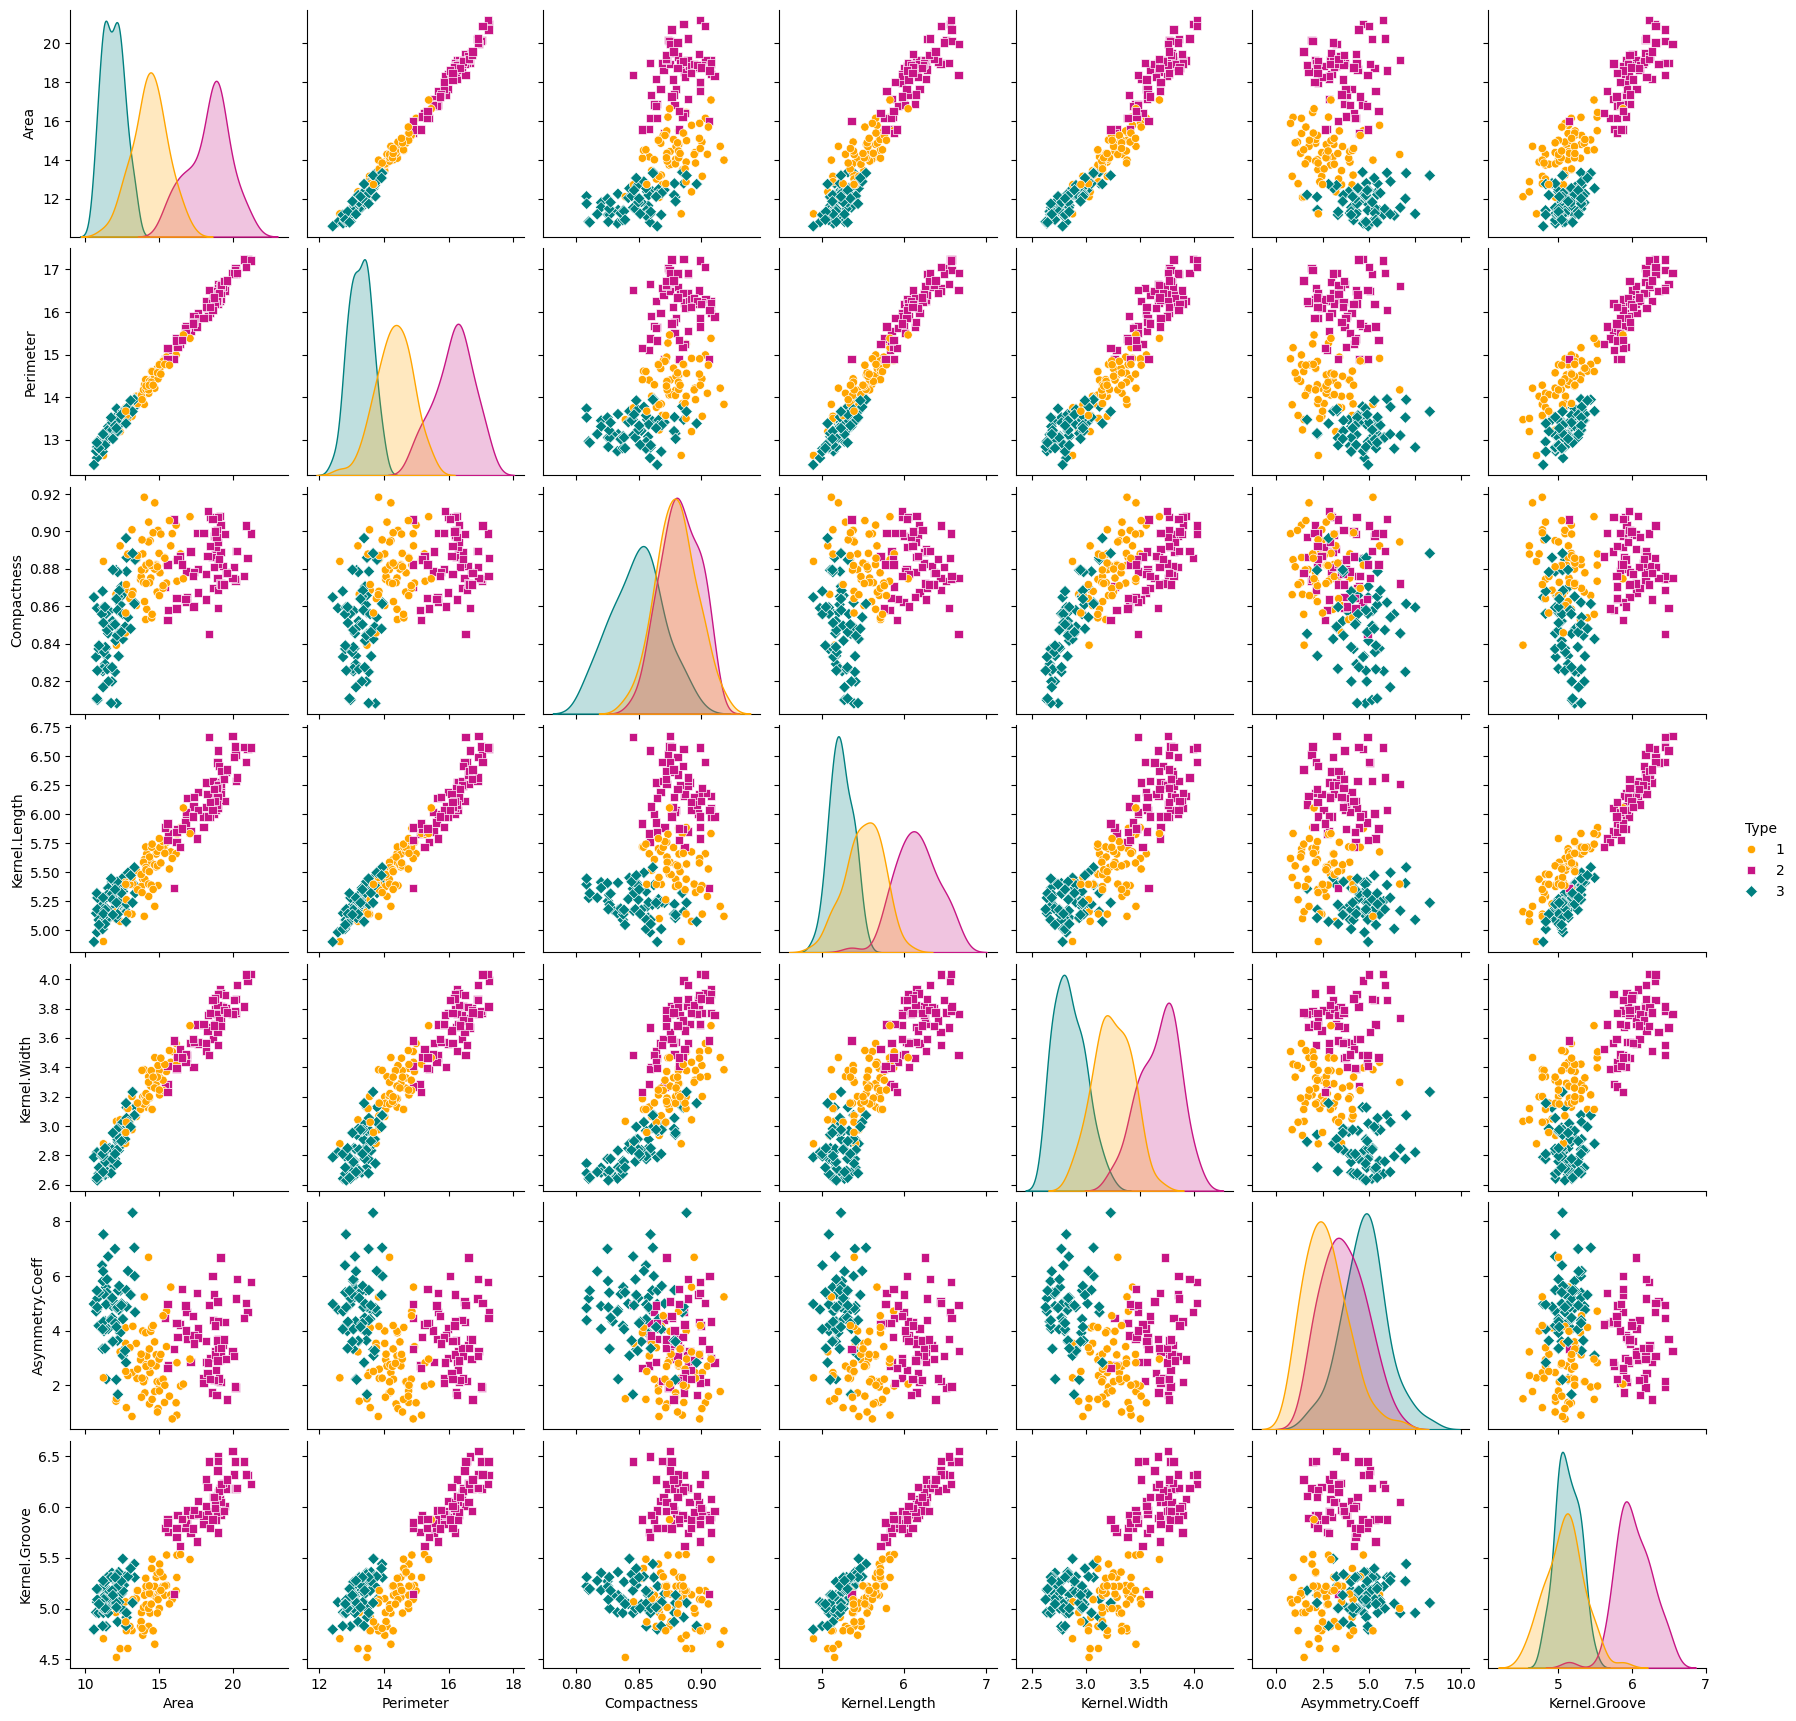

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

seeds = pd.read_csv('../seeds.csv')
seeds = seeds.sample(frac=1, random_state=200) # shuffel Data
seeds = seeds.reset_index().drop(['index'], axis=1)
seeds

palette = {1: 'orange', 2: 'mediumvioletred', 3: 'teal'}
p_plot = sns.pairplot(seeds, vars = seeds.columns[0:7], hue="Type", palette=palette, markers=["o", "s", "D"])

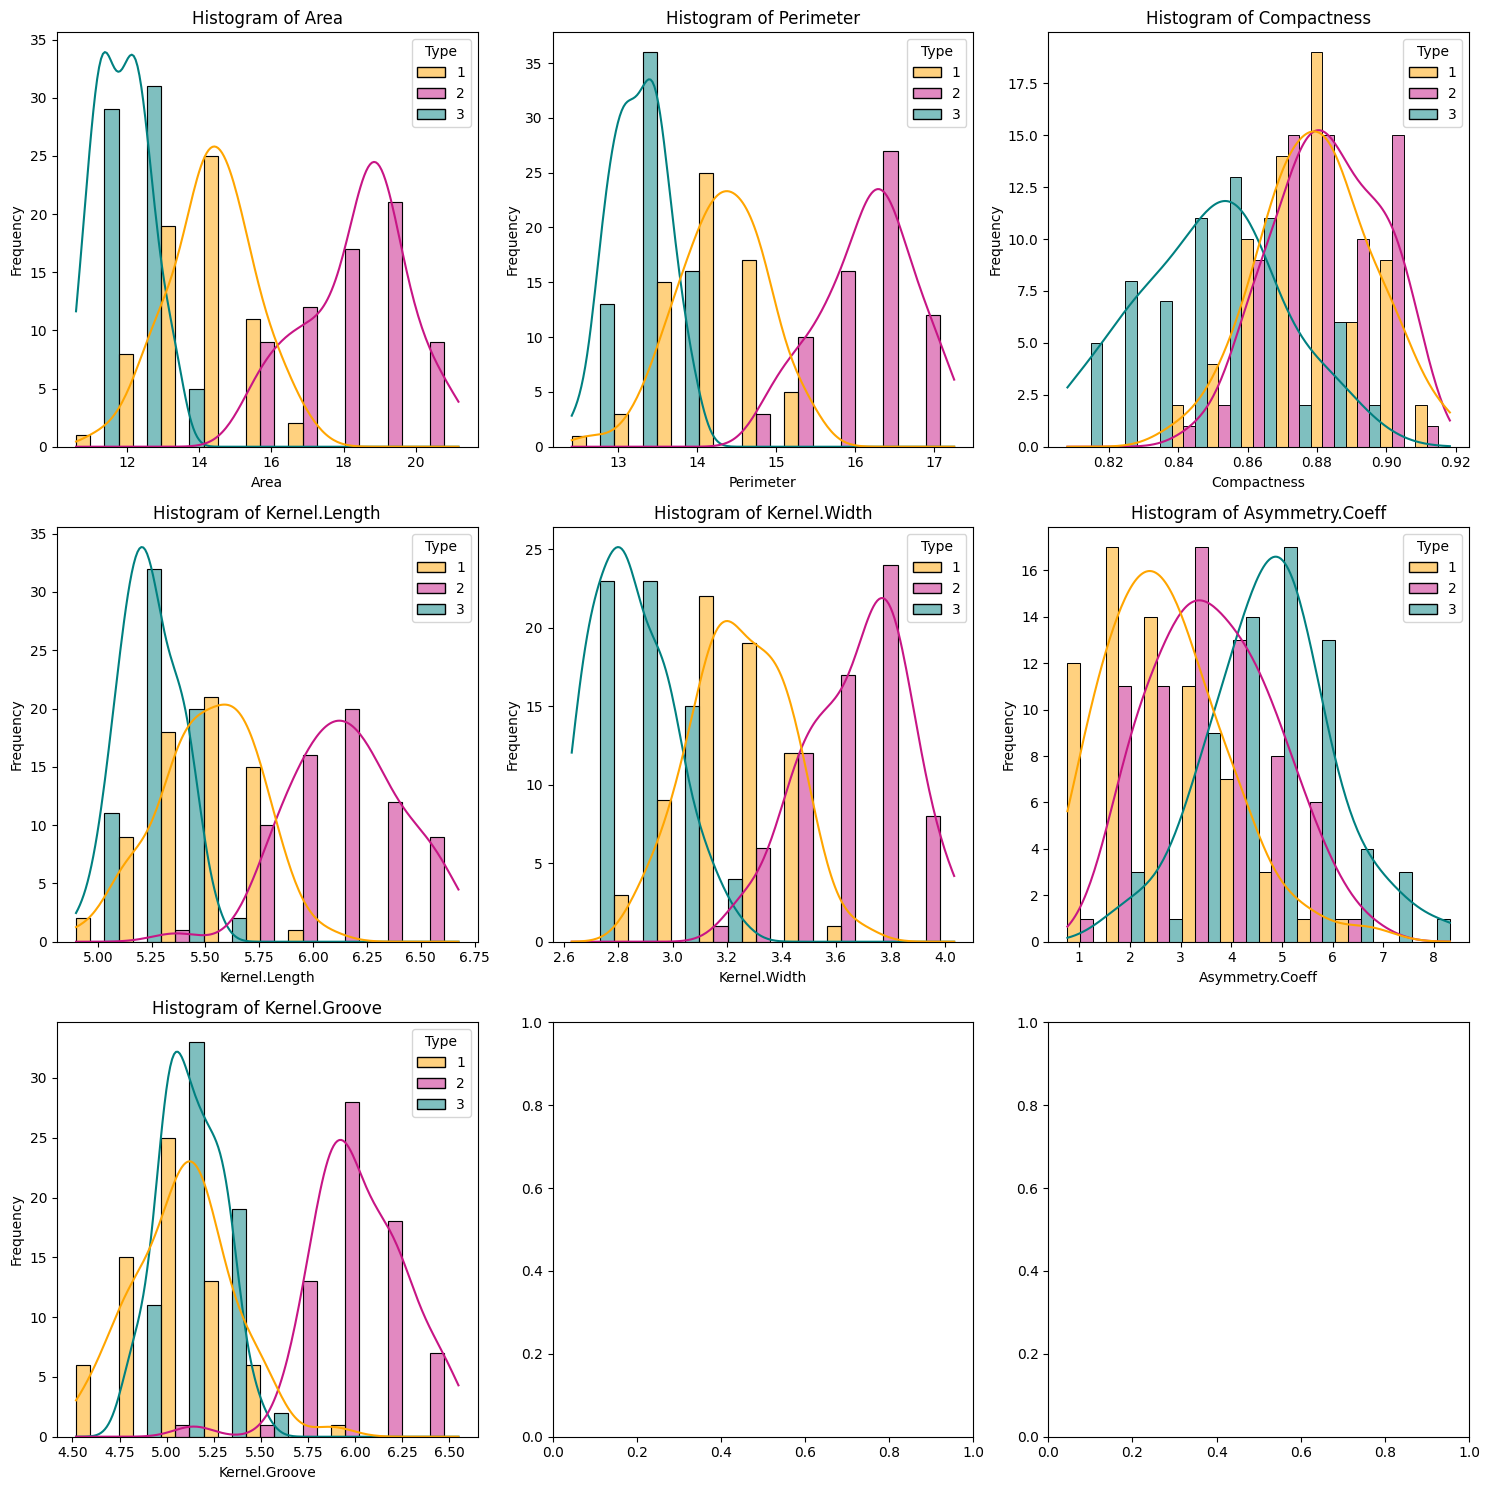

In [11]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()

features = ['Area', 'Perimeter', 'Compactness', 'Kernel.Length', 'Kernel.Width', 'Asymmetry.Coeff', 'Kernel.Groove']
for i, feature in enumerate(features):
    sns.histplot(data=seeds, x=feature, hue='Type', multiple='dodge', kde=True, palette=palette, ax=axes[i])
    axes[i].set_title('Histogram of {}'.format(feature))
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')
    
plt.tight_layout()
plt.show()

In [12]:
Y = seeds['Type']
X = seeds.drop(['Type'], axis=1)

means = X.mean()
vars = X.var()
for col in X.columns:
    X[col] = (X[col] - means[col]) / np.sqrt(vars[col])

N, d = X.shape
data_test_num = int(0.2 * N)
X_test = X.iloc[:data_test_num, :]
Y_test = Y.iloc[:data_test_num]
X_train = X.iloc[data_test_num:, :]
Y_train = Y.iloc[data_test_num:]

X_train

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove
39,1.332633,1.292822,0.848604,1.417625,1.129905,-0.314198,1.283385
40,1.390853,1.575168,-0.506456,2.042071,1.069110,-0.005586,2.186539
41,0.753861,0.728128,0.788570,0.466304,0.794211,-0.571828,0.660310
42,-1.054373,-1.057526,-0.802340,-1.055360,-1.135364,-0.068804,-0.764440
43,0.157966,0.232113,-0.009029,0.542950,0.006522,0.518511,0.759759
...,...,...,...,...,...,...,...
194,0.065499,-0.042603,1.191658,-0.144616,0.519313,-0.388292,-0.488420
195,0.801807,0.865486,0.235397,0.754856,0.868223,0.570853,0.751641
196,0.264131,0.117648,1.500406,-0.261841,0.656762,-1.427649,-0.760381
197,1.209344,1.163095,0.912927,1.045663,1.330792,-0.995320,0.757729


0.9230769230769231
0.8974358974358975
0.9230769230769231
0.8974358974358975
0.8974358974358975
0.9230769230769231
0.8974358974358975
0.8974358974358975
0.8974358974358975
0.8974358974358975
accuracy:
[0.92307692 0.8974359  0.92307692 0.8974359  0.8974359  0.92307692
 0.8974359  0.8974359  0.8974359  0.8974359 ]


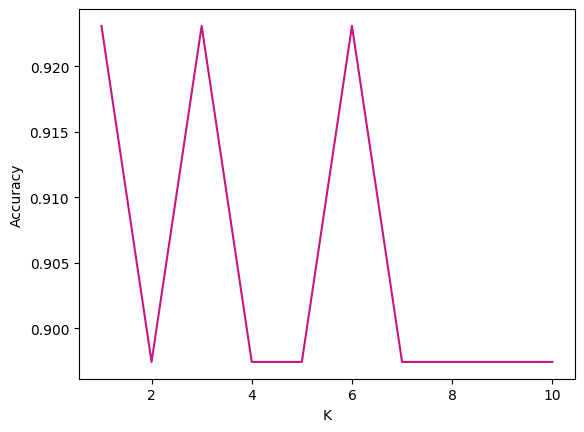

In [50]:
def find_KNN(X_train: pd.DataFrame, y_train:np.ndarray, x: np.ndarray, k: int):
    N, d = X_train.shape
    distances = dict()

    for index, row in X_train.iterrows():
        xi = np.array(row)
        distances[index] = np.linalg.norm(x - xi)
    
    sorted_distances = dict(sorted(distances.items(), key=lambda item: item[1]))
    class1_neighbours = class2_neighbours = class3_neighbours = 0

    for i in range(k):
        k_nearest_index = list(sorted_distances)[i]
        if y_train[k_nearest_index] == 1:
            class1_neighbours += 1
        elif y_train[k_nearest_index] == 2:
            class2_neighbours += 1
        else:
            class3_neighbours += 1

    if class1_neighbours > class2_neighbours:
        if class1_neighbours > class3_neighbours:
            return 1
        else:
            return 3
    else:
        if class2_neighbours > class3_neighbours:
            return 2
        else:
            return 3

def KNN(k: int, X_train: pd.DataFrame, Y_train: pd.DataFrame, X_test: pd.DataFrame, Y_test: pd.DataFrame):
    X_train = X_train.reset_index().drop(['index'], axis=1)
    Y_train = Y_train.reset_index().drop(['index'], axis=1)
    y_hat = np.zeros(Y_test.size)
    for index, row in X_test.iterrows():
        y_hat[index] = find_KNN(X_train, np.array(Y_train), np.array(row), k)
    return y_hat

def calculate_accuracy(y_test: np.ndarray, y_pred: np.ndarray):
    T = 0
    F = 0
    for i in range(y_pred.size):
        if y_pred[i] == y_test[i]:
            T += 1
        else:
            F += 1
    return T/(T+F)

K = np.arange(1, 11, 1)
accuracy = np.zeros(10)
for k in K:
    y_pred = KNN(k, X_train, Y_train, X_test, Y_test)
    # print("---"+str(y_pred)+"---")
    acc = calculate_accuracy(np.array(Y_test), y_pred)
    print(acc)
    accuracy[k-1] = acc

print(f"accuracy:\n{accuracy}")

plt.plot(K, accuracy, color='mediumvioletred')
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.show()